## Logistic Regression

Logistic regression is a type of regression technique suitable when we would like to predict a binary variable, given a linear combination of input features. For example, predicting whether the cancer is malignant or benign, depending on variables such as patient's age, blood type, weight etc. <br>
Similar to linear regression, it has a real-valued weight vector w and a real-valued bias b.
Unlike linear regression which used an identity function as its activation function, logistic regression uses the sigmoid function as its activation function. <br>
Additionally, it does not have a closed-form solution. However, the cost function is convex, which allows gradient descent to be used for training the model. <br>
### Training Steps
1. Initialize weight vector and bias with zero (or very minimal) values
2. Calculate $\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $
3. Apply the sigmoid activation function, which will return a value between 0 and 1 <br>
$\boldsymbol{\hat{y}} = \sigma(\boldsymbol{a}) = \frac{1}{1 + \exp(-\boldsymbol{a})}$
4. Compute the cost. Since, the model has to return probability of the target value as 0 or 1, our cost function should be such that it gives a high probability for a positive target samples and small values for negative target samples. This leads to the cost function looking like <br>
$J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$
5. Compute the gradient descent, for more information, give [this](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated) a look <br>
$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)}$
6. Update the weights and bias <br>
$w = w - \alpha \, \nabla_{\boldsymbol{w}} J$ <br>
$b = b - \alpha \, \nabla_{\boldsymbol{b}} J$

where, $\alpha$ is the learning rate

### Data

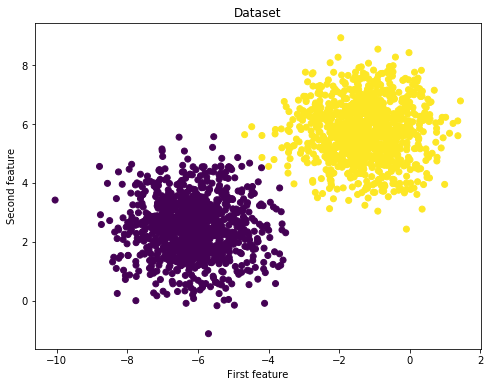

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
    
np.random.seed(1234)

X, y = make_blobs(n_samples=2000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show()

In [20]:
# Reshaping y variable such that it is (n_samples, 1)
# or in other words, making it a column vector
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (1500, 2)
Shape y_train: (1500, 1)
Shape X_test: (500, 2)
Shape y_test: (500, 1)


### Model

In [31]:
class LogisticRegression:
    def __init__(self):
        pass
    
    def sigmoid(self, a):
        return 1/(1 + np.exp(-a))
    
    def train(self, X, y, alpha=0.001, iterations=100):
#         Step 1: Initialize the parameters
        n_samples, n_features = X.shape
        self.w = np.zeros(shape=(n_features,1))
        self.b = 0
        J = []
        
        for i in range(iterations):
#             Step 2 and 3: Computing linear combination of input features
#             and then passing through sigmoid activation function
            y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
#             Step 4: Compute the cost
            cost = (-1/n_samples)*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
            J.append(cost)
#             Step 5: Compute gradient descent
            dJ_dw = (1/n_samples)*np.dot(X.T, y_hat-y)
            dJ_db = (1/n_samples)*np.sum(y_hat-y)
#             Step 6: Update the parameters
            self.w = self.w - alpha*dJ_dw
            self.b = self.b - alpha*dJ_db
            
            if i % 100 == 0:
                print(f'Cost after iteration {i}: {cost}')
                
        return self.w, self.b, J
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
        y_pred_label = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_label)[:, np.newaxis]

### Initializing and training the model

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.34222431599248243
Cost after iteration 200: 0.2257715571571526
Cost after iteration 300: 0.1704064152167814
Cost after iteration 400: 0.13827298750895137
Cost after iteration 500: 0.11726158602641605


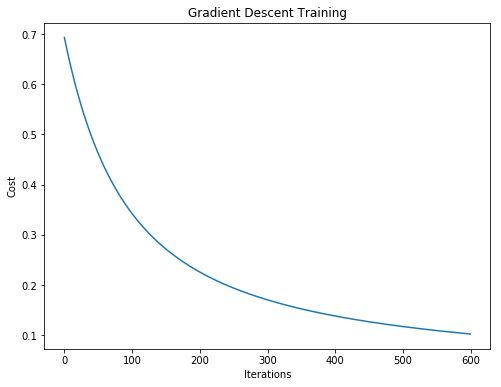

In [32]:
logistic_regressor = LogisticRegression()
w_trained, b_trained, J = logistic_regressor.train(X_train, y_train, alpha=0.003, iterations=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), J)
plt.title("Gradient Descent Training")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

### Testing the model

In [33]:
y_pred_train = logistic_regressor.predict(X_train)
y_pred_test = logistic_regressor.predict(X_test)
print(f"train accuracy: {100 - np.mean(np.abs(y_pred_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_pred_test - y_test))*100}%")

train accuracy: 99.93333333333334%
test accuracy: 99.8%


### Visualize decision boundary

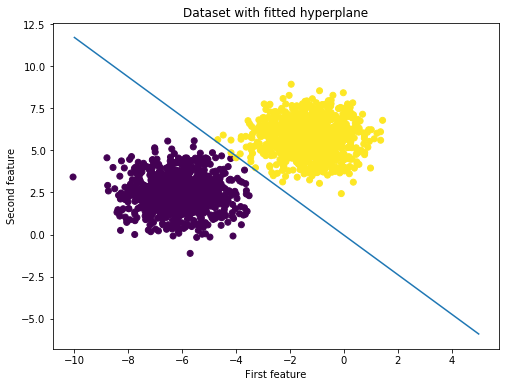

In [40]:
def plot_hyperplane(X, y, w, b):
    slope = -w[0]/w[1]
    intercept = -b/w[1]
    x_hyperplane = np.linspace(-10,5,5)
    y_hyperplane = slope*x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset with fitted hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
    
plot_hyperplane(X, y, w_trained, b_trained)